<a href="https://colab.research.google.com/github/shsnks/shsnks/blob/main/hazardous%20asteroid%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

###Exploring Data

In [ ]:
df = pd.read_csv("nasa.csv")

In [ ]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df.shape

(4687, 40)

In [ ]:
df.info

<bound method DataFrame.info of       Neo Reference ID     Name  ...  Equinox  Hazardous
0              3703080  3703080  ...    J2000       True
1              3723955  3723955  ...    J2000      False
2              2446862  2446862  ...    J2000       True
3              3092506  3092506  ...    J2000      False
4              3514799  3514799  ...    J2000       True
...                ...      ...  ...      ...        ...
4682           3759007  3759007  ...    J2000      False
4683           3759295  3759295  ...    J2000      False
4684           3759714  3759714  ...    J2000      False
4685           3759720  3759720  ...    J2000      False
4686           3772978  3772978  ...    J2000      False

[4687 rows x 40 columns]>

##Checking for missing data

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

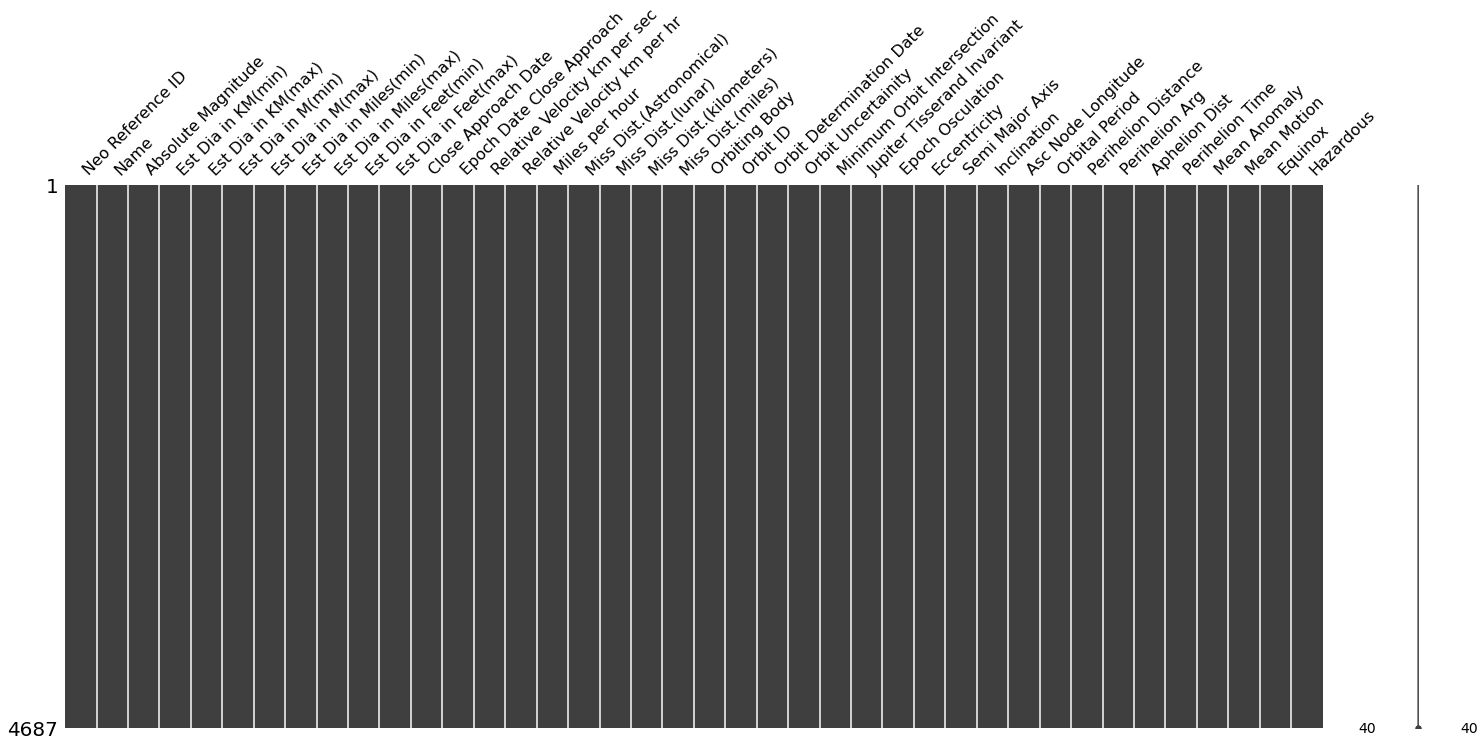

In [ ]:
print(df.isnull().sum())
import missingno as msno
msno.matrix(df)

###Data Preprocessing and Data Visualisation

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()
df['hazardous'] = l_enc.fit_transform(df.Hazardous) 
print('Hazardous == True -> 1')
print('Hazardous == False -> 0\n')

Hazardous == True -> 1
Hazardous == False -> 0



In [ ]:
df = df.drop(["Hazardous"],axis=1)
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1


###By Observing Heatmap we start Data cleaning

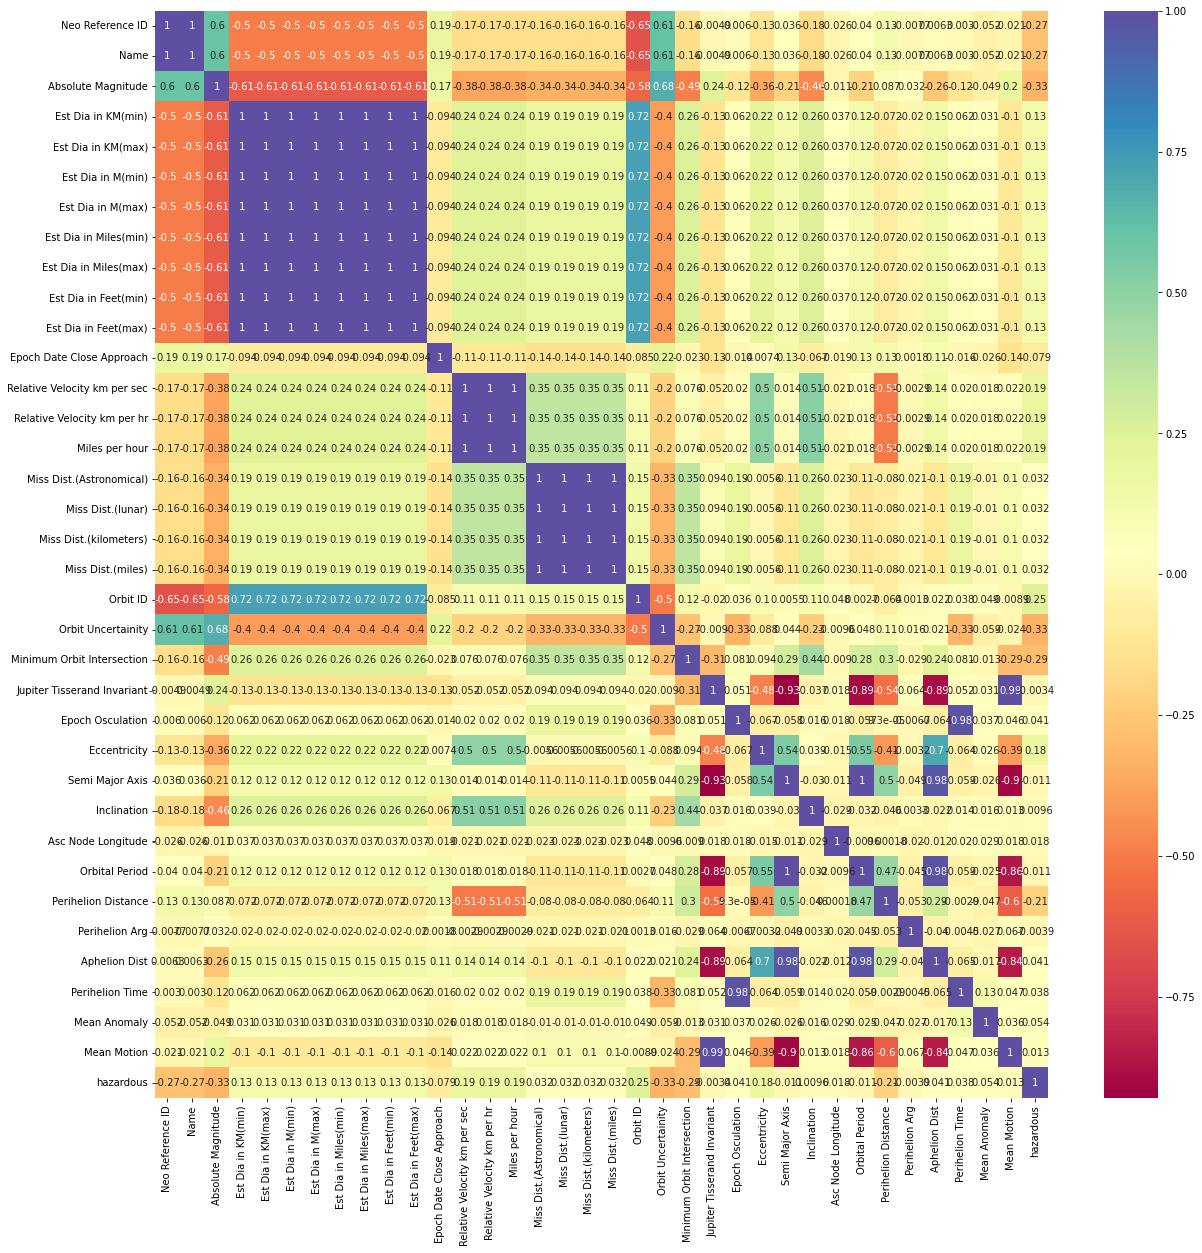

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),cmap="Spectral",annot=True) 

In [ ]:
df = df.drop(["Orbiting Body", "Equinox"], axis =1) #consist same data

In [ ]:
df = df.drop(["Name","Neo Reference ID","Orbit ID"],axis = 1) #name and Id doesn't contribute anything in our objective

In [ ]:
df = df.drop(["Epoch Date Close Approach","Close Approach Date","Orbit Determination Date"],axis =1) #Date doesn't contribute anything in our objective

In [ ]:
df = df.drop(["Est Dia in KM(max)", "Est Dia in M(min)", "Est Dia in M(max)", "Est Dia in Miles(min)" ,"Est Dia in Miles(max)", "Est Dia in Feet(min)", "Est Dia in Feet(max)", "Relative Velocity km per hr", "Miles per hour", "Miss Dist.(lunar)", "Miss Dist.(kilometers)", "Miss Dist.(miles)"], axis = 1) #same data with different Units so Doesn't contribute anything in our objective

In [ ]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,hazardous
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [ ]:
df.shape

(4687, 20)

###Heatmap after Data cleaning

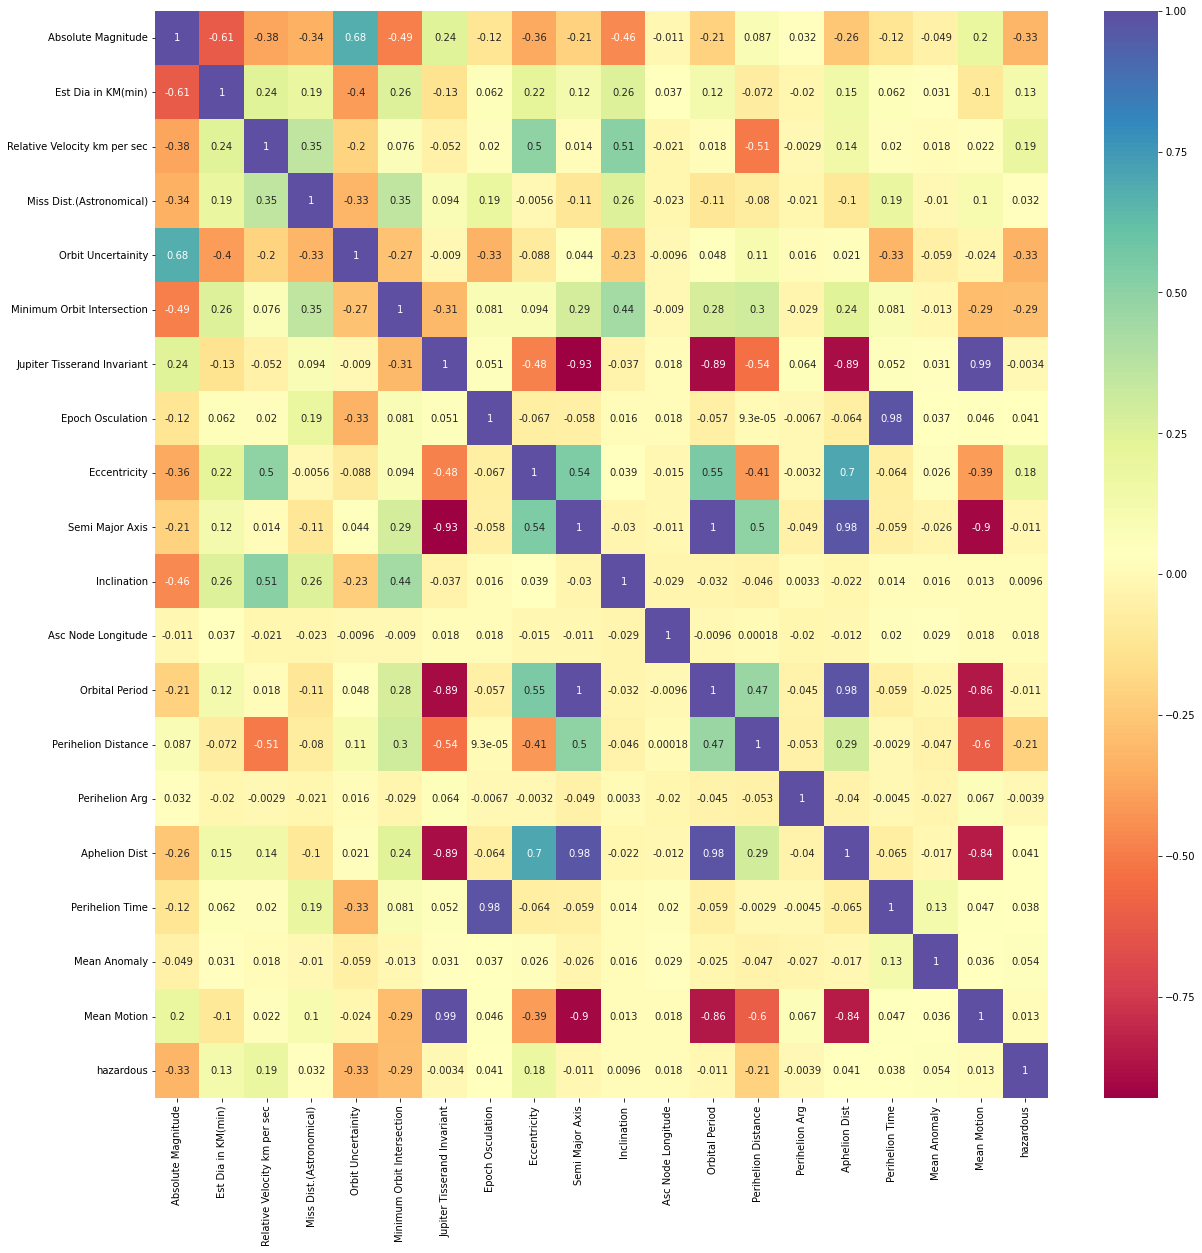

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),cmap="Spectral",annot=True) 

###Start Building Model

In [ ]:
x=df.drop(['hazardous'],axis=1)
y=df['hazardous'].astype(int)
x, y = df.iloc[: , :-1], df.iloc[: , -1]

In [ ]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,hazardous
0,21.6,0.127220,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.3,0.231502,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.4,0.008801,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.6,0.127220,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10 , test_size=0.3)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

###Hyper parameter optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import xgboost

In [ ]:
# Hyper parameter optimization
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import xgboost

In [ ]:
# Hyper parameter optimization
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
import xgboost

In [ ]:
params = {
    "max_depth" :[3,4,5],
    "min_child_weight":[2,3,5,7],
    "learning_rate":[0.01,0.05,0.07,0.1,0.2,0.3],
    "colsample_bytree":[0.3,0.5,0.7,0.9],
    "gamma":[0.0,0.1,0.2,0.3,0.4]
}

##XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier_xbg = XGBClassifier()
random_search = RandomizedSearchCV(classifier_xbg,param_distributions=params,n_iter=5,scoring="roc_auc",n_jobs = -1,cv=5,verbose = 3)
classifier_xbg.fit(x_train, y_train)
Y_pred_xbg = classifier_xbg.predict(x_test)
print(confusion_matrix(y_test,Y_pred_xbg ))
print(classification_report(y_test,Y_pred_xbg ))
print(accuracy_score(y_test,Y_pred_xbg ))

[[1175    0]
 [   1  231]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1175
           1       1.00      1.00      1.00       232

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407

0.9992892679459844


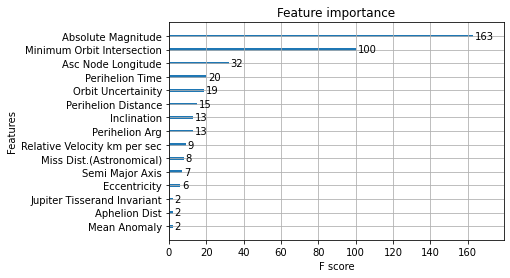

In [ ]:
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(classifier_xbg)
pyplot.show()

###**About Dataset**

The data consist information regarding Asteroid like their Name, IDs, relative velocities, Estimated diameter inclination etc. by using this data we can search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body Id, as well as browse the overall data-set.

###**Task**
-Build a model that can predict if the asteroid is going to be hazardous or not.

-To find the features which contribute the most in our prediction.

###**Method used in Predicting**
XGBoost Classifier
using randomized search

###**Conclusion**
XGBoost classifier predicts the most accurate ($99.92$%) 


By observing Graph we can conclude the importance and contribution of that particular feature in the prediction of our model.
